# Actividad Regresión Lineal 
## Carolina Lara Suarez A01368710

### Modulos para análisis de datos y aprendizaje automático
- Panadas (pd) Fundamental para el análisis y manipulación de datos
- Numpy (np)  Soporte para arrays y matrices multidimensionales
- Matplotlib.pyplot (plt) Representa gráficamente los resultados de análisis de datos.
- Sklearn.linear_model.LinearRegression Modela la relación entre variables mediante una ecuación lineal para hacer predicciones.
- Sklearn.model_selection.train_test_split Dividir conjuntos de datos en subconjuntos de entrenamiento y prueba. 
-  Sklearn.metrics (mean_squared_error, r2_score) Porporciona funciones para evaluar el rendimiento de modelos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



### Cargar Datos
- Archivo 'Valhalla23'
- Columnas: Celsius y Valks

In [2]:
df = pd.read_csv("Valhalla23.csv")
print("Dataset")
print(df.head())


Dataset
   Celsius    Valks
0  61.4720 -139.740
1  70.5790 -156.600
2  -7.3013   73.269
3  71.3380 -165.420
4  43.2360  -75.835


### Obtener variables de predicción y objetivo
- Columna X : 'Valks' Como Input
- Colunma C : 'Celsius' Como Salida de predicción

In [3]:
X = df[["Valks"]]    
y = df["Celsius"] 


### Separar Subconjuntos de entrenamiento y de prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Entrenar el modelo de regresión lineal 

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Intercepto: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")


Intercepto: 16.748979546942095
Coeficientes: [-0.33310249]


### Evaluar el desempeño del modelo de regresión líneal
- Primera evaluación: usando R2 
- Segunda evaluación: manual con predicciones

In [6]:

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(f"R² en entrenamiento: {r2_train:.2f}")
print(f"R² en prueba: {r2_test:.2f}")


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE en prueba: {mse:.2f}")
print(f"R² (manual) en prueba: {r2:.2f}")


R² en entrenamiento: 0.99
R² en prueba: 1.00
MSE en prueba: 2.38
R² (manual) en prueba: 1.00


### Visualización de Datos

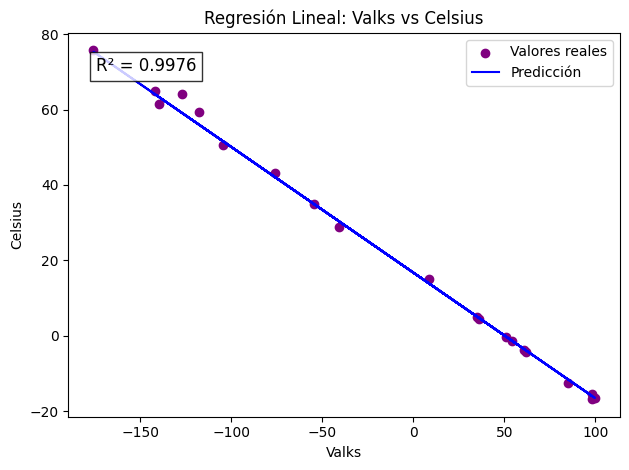

In [7]:
plt.scatter(X_test, y_test, color='purple', label='Valores reales')
plt.plot(X_test, y_pred, color='blue', label='Predicción')
plt.xlabel("Valks")
plt.ylabel("Celsius")
plt.title("Regresión Lineal: Valks vs Celsius")
plt.legend()
intercepto = model.intercept_
coef = model.coef_[0]
r2_test = r2_score(y_test, model.predict(X_test))
ecuacion = f'y = {intercepto:.2f} + ({coef:.2f})x'
plt.text(0.05, 0.9, f'R² = {r2_test:.4f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

plt.show()

### Desempeño del modelo
- Temperaturas ingresadas manualmentepara obtener el valor en celsius 

In [8]:
nuevos_valks = pd.DataFrame({"Valks": [
    66.37, 130, 140]})
predicciones = model.predict(nuevos_valks)

print("Predicciones de nuevos valores:")

for v, c in zip(nuevos_valks["Valks"], predicciones):
    print(f"Valks: {v} -> Celsius estimado: {c:.2f}")

comparacion = pd.DataFrame({
    "Valks": X_test["Valks"].values,
    "Celsius real": y_test.values,
    "Celsius predicho": y_pred
})


comparacion["Error absoluto"] = abs(comparacion["Celsius real"] - comparacion["Celsius predicho"])


print("Comparación de valores reales vs predichos:")
print(comparacion.sample(5))


Predicciones de nuevos valores:
Valks: 66.37 -> Celsius estimado: -5.36
Valks: 130.0 -> Celsius estimado: -26.55
Valks: 140.0 -> Celsius estimado: -29.89
Comparación de valores reales vs predichos:
      Valks  Celsius real  Celsius predicho  Error absoluto
6  -142.020       64.9130         64.056195        0.856805
4    54.276       -1.3127         -1.330491        0.017791
2  -127.100       64.0720         59.086306        4.985694
14   84.882      -12.4150        -11.525426        0.889574
5    99.744      -16.5550        -16.475995        0.079005


### Análisis de la precisión del modelo de conversión de temperatura 
 Al revisar los resultados del modelo para la conversión entre temperaturas  Valks y humanas Celsius, se oberva que el modelo es altamente preciso para un uso cotidiano. Los errores son minimos en el contexto de la medición de temperatura. El error máximo sería de alrededor de 1.4 °C y el error promedio es de menos de 1°C. Un error de 1-2°C es apenas perceptible para los humanos. No notaríamos la diferencia entre 22°C o 23°C en una habitación. 




### Explicación en el contexto del Problema
Este modelo funciona como un traductor de temperaturas entre Valks y Celsius. Es como tener un diccionario de  entre ambas especies sin tener confusiones que puedan llegar a generar conflictos. 
Gracias a este traductor, es posible comunicar información climática de manera precisa y segura en entornos compartidos, evitando malentendidos que podrían derivar en inconvenientes.


 

  
